In [820]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [821]:
data = pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')
del data['Date']

In [ ]:
#Finding number of classes for individual qualitative predictor
print('Unique Classes in Seasons column:',data.Seasons.unique())
print('Unique Classes in Holiday column:',data.Holiday.unique())
print('Unique Classes in Functioning Day column:',data['Functioning Day'].unique())

In [822]:
# Creating Dummy Variables for Qualitative Predictors
SpringList=[0]*len(data)
SummerList=[0]*len(data)
AutumnList=[0]*len(data)

Holiday = [0]*len(data)

FunctioningDay = [0]*len(data)

for i in range(len(data)):
    if(data['Holiday'][i]=='Holiday'):
        Holiday[i]=1
    if(data['Functioning Day'][i]== 'Yes'):
        FunctioningDay[i]=1
    if(data['Seasons'][i]=='Spring'):
        SpringList[i]=1
    elif(data['Seasons'][i]=='Summer'):
        SummerList[i]=1
    elif(data['Seasons'][i]=='Autumn'):
        AutumnList[i]=1

In [823]:
data['Seasons_Spring'] = SpringList
data['Seasons_Summer'] = SummerList
data['Seasons_Autumn'] = AutumnList
data['Holiday_Dummy'] = Holiday
data['FunctioningDay'] = FunctioningDay

del data['Seasons']
del data['Holiday']
del data['Functioning Day']

In [ ]:
#Checking for null values
data.isnull().sum()

In [886]:
#Summary Statistics of the Data
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Autumn,Holiday_Dummy,FunctioningDay
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,0.252055,0.252055,0.249315,0.049315,0.966324
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.434217,0.434217,0.432641,0.216537,0.180404
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1378]:
# Differentiating dependent and independent variables
X = data.iloc[:,1:].values
Y = data.iloc[:,0].values

In [1379]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [1380]:
X_train

array([[15. ,  8.2, 62. , ...,  0. ,  0. ,  1. ],
       [18. , 28.4, 57. , ...,  0. ,  0. ,  1. ],
       [11. , 29.9, 57. , ...,  0. ,  0. ,  1. ],
       ...,
       [11. , 25.5, 57. , ...,  0. ,  0. ,  1. ],
       [ 0. ,  8.3, 59. , ...,  0. ,  0. ,  1. ],
       [20. ,  7.1, 83. , ...,  0. ,  0. ,  1. ]])

In [849]:
Feature_Scaling(X_train)
X_train

array([[ 0.50774916, -0.38874606,  0.18996015, ..., -0.58042598,
        -0.23202281,  0.18254726],
       [ 0.9408263 ,  1.29850393, -0.05608294, ..., -0.58042598,
        -0.23202281,  0.18254726],
       [-0.06968702,  1.42379477, -0.05608294, ..., -0.58042598,
        -0.23202281,  0.18254726],
       ...,
       [-0.06968702,  1.05627497, -0.05608294, ..., -0.58042598,
        -0.23202281,  0.18254726],
       [-1.65763652, -0.38039334,  0.0423343 , ..., -0.58042598,
        -0.23202281,  0.18254726],
       [ 1.22954439, -0.48062601,  1.22334111, ..., -0.58042598,
        -0.23202281,  0.18254726]])

# Gradeint Descent Logic

In [1297]:
def Feature_Scaling(X):
    mean=np.zeros(X.shape[1])
    std=np.zeros(X.shape[1])
    for col in range(X.shape[1]):
        mean[col] = np.mean(X.transpose()[col])
        std[col]=np.std(X.transpose()[col])

        for row in range(X.shape[0]):
            X[row][col] = (X[row][col] - mean[col]) / std[col]
            
    return X

In [1298]:
def Cost_Function(beta,X,Y):
    J=0
    m = len(Y)
    y_pred = np.dot(X,beta)
    J = (1/(2*m)) * sum(np.square(y_pred-Y))
    return J

In [1299]:
def GradientDescent(X_train, Y_train , learning_rate, convergence):
    
    X_train=Feature_Scaling(X_train)
    
    np.random.seed(10)
    beta = (np.random.sample(len(X_train[0])+1)*10).reshape(len(X_train[0])+1,1)
    L = learning_rate
    old_cost=0
    Convergence_Criteria =1
    #convergence = 0.01
    CostList=[]

    one_column = np.ones((X_train.shape[0],1))
    X = np.concatenate((one_column, X_train), axis = 1)

    Y = Y_train.reshape(len(Y_train),1)
    m = len(Y)
    
    i=0
    while(Convergence_Criteria>convergence):
    #for i in range (500):
        y_pred = np.dot(X,beta) # 7008x1 | Y=7008x1 

        for j in range(X.shape[1]): #range = 0 to 15 [number of variables]
            beta[j] = beta[j] - (L/m) * sum((y_pred - Y) * X.T[j].reshape(len(X.T[1]),1)) # Changing X shape into 7008X1

        #print(beta[0])
        cost = Cost_Function(beta,X,Y)
        CostList.append(cost)
        if(len(CostList)>1):
            Convergence_Criteria = CostList[-2]-CostList[-1]
        i+=1
    
    return CostList, i, beta 

In [1300]:
def Predict(X,Y,beta):
    X=Feature_Scaling(X)
    Y = Y.reshape(len(Y),1)
    y_pred = np.dot(X,beta[1:]) + beta[0]
    m=len(y_pred)
    J = (1/(2*m)) * sum(np.square(y_pred-Y))
    return J

# Linear Regression

Number of Iterations:  553
Cost after Convergence:  [93094.12109495]


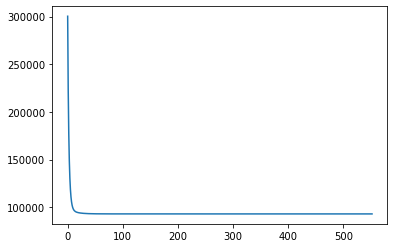

In [614]:
learning_rate=0.2
convergence = 0.01

CostList, Iterations, beta = GradientDescent(X_train, Y_train,learning_rate, convergence )

print("Number of Iterations: ",Iterations)
print("Cost after Convergence: ",CostList[-1])
plt.plot(CostList)

# Working with Different Learning rates

In [831]:
learning_rate = [1,0.1,0.01,0.001]
convergence = 0.001
All_Cost = []
IterationList=[]
TrainErrors=[]
TestErrors =[]
for alpha in learning_rate:
    CostList, Iterations, beta = GradientDescent(X_train, Y_train,alpha,convergence)
    All_Cost.append(CostList)
    print("Number of Iterations: ",Iterations)
    IterationList.append(Iterations)
    print("Cost after Convergence: ",CostList[-1])
    TrainErrors.append(CostList[-1])
    
    #Predicting with the beta values calculated
    test_error=Predict(X_test,Y_test,beta)
    TestErrors.append(test_error)

Number of Iterations:  2
Cost after Convergence:  [390718.00987156]
Number of Iterations:  2938
Cost after Convergence:  [93089.57759916]
Number of Iterations:  4913
Cost after Convergence:  [93098.28654603]
Number of Iterations:  22583
Cost after Convergence:  [93105.92773491]


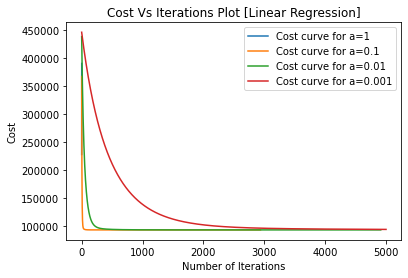

In [888]:
for i in range(len(learning_rate)):
    plt.plot(All_Cost[i][:5000],label="Cost curve for a="+str(learning_rate[i]))

plt.title("Cost Vs Iterations Plot [Linear Regression]")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

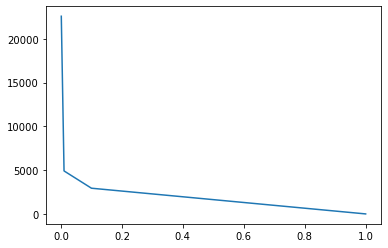

In [860]:
plt.plot(learning_rate,IterationList)

In [859]:
# For Table
df = {"Learning Rate":learning_rate,"Convergence Criteria":convergence,"Iterations":IterationList,"Train Errors":TrainErrors,"Test Errors":TestErrors}
table=pd.DataFrame(df) 
table

,Learning Rate,Convergence Criteria,Iterations,Train Errors,Test Errors
0,1.000,0.001,2,[390718.0098715635],[376364.11771382403]
1,0.100,0.001,2938,[93089.57759916266],[95354.6429903118]
2,0.010,0.001,4913,[93098.28654602937],[95337.67542922079]
3,0.001,0.001,22583,[93105.92773490575],[95353.23921918348]


# Working with different convergence values

In [964]:
learning_rate1 = 0.01
convergence1 = [0.1,0.01,0.001]
All_Cost1 = []
IterationList1=[]
TrainErrors1=[]
TestErrors1 =[]
for c in convergence1:
    CostList1, Iterations1, beta1 = GradientDescent(X_train, Y_train,learning_rate1,c)
    All_Cost1.append(CostList1)
    print("Number of Iterations: ",Iterations1)
    IterationList1.append(Iterations1)
    print("Cost after Convergence: ",CostList1[-1])
    TrainErrors1.append(CostList1[-1])
    
    #Predicting with the beta values calculated
    test_error1=Predict(X_test,Y_test,beta1)
    TestErrors1.append(test_error1)

Number of Iterations:  1410
Cost after Convergence:  [93135.57196603]
Number of Iterations:  2258
Cost after Convergence:  [93105.9211269]
Number of Iterations:  4913
Cost after Convergence:  [93098.28654603]


In [1265]:
# Learning rate = 0.01
df1 = {"Learning Rate":learning_rate1,"Convergence Threshold":convergence1,"Iterations":IterationList1,"Train Errors":TrainErrors1,"Test Errors":TestErrors1}
table1=pd.DataFrame(df1) 
table1

,Learning Rate,Convergence Threshold,Iterations,Train Errors,Test Errors
0,0.01,0.100,1410,[93135.57196602893],[95436.43371995896]
1,0.01,0.010,2258,[93105.92112689611],[95353.19022505969]
2,0.01,0.001,4913,[93098.28654602937],[95337.67542922078]


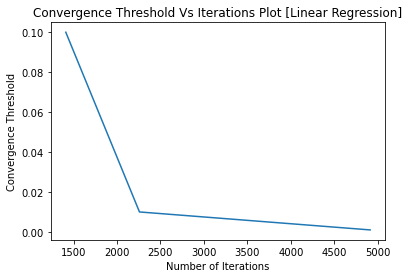

In [967]:
#plt.plot(convergence1,IterationList1)
plt.plot(IterationList1,convergence1)
plt.title("Convergence Threshold Vs Iterations Plot [Linear Regression]")
plt.xlabel("Number of Iterations")
plt.ylabel("Convergence Threshold")
#plt.legend()
plt.show()

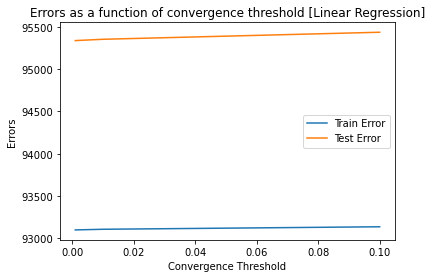

In [1267]:
# Plotting Threshold Vs Train and Test Errors
plt.plot(convergence1,TrainErrors1, label ="Train Error")
plt.plot(convergence1,TestErrors1, label ="Test Error")
plt.title("Errors as a function of convergence threshold [Linear Regression]")
plt.ylabel("Errors")
plt.xlabel("Convergence Threshold")
plt.legend()
plt.show()

In [1306]:
# Picking the best threshold and plot train and test errors as a function of # iterations
learning_rate1 = 0.01
convergence1 = 0.001

#Train Data
CostList1, Iterations1, beta1 = GradientDescent(X_train, Y_train,learning_rate1,convergence1)

# Test Data
CostList2, Iterations2, beta2 = GradientDescent(X_test, Y_test,learning_rate1,convergence1)


In [1310]:
X_train

array([[ 0.50774916, -0.38874606,  0.18996015, ..., -0.58042598,
        -0.23202281,  0.18254726],
       [ 0.9408263 ,  1.29850393, -0.05608294, ..., -0.58042598,
        -0.23202281,  0.18254726],
       [-0.06968702,  1.42379477, -0.05608294, ..., -0.58042598,
        -0.23202281,  0.18254726],
       ...,
       [-0.06968702,  1.05627497, -0.05608294, ..., -0.58042598,
        -0.23202281,  0.18254726],
       [-1.65763652, -0.38039334,  0.0423343 , ..., -0.58042598,
        -0.23202281,  0.18254726],
       [ 1.22954439, -0.48062601,  1.22334111, ..., -0.58042598,
        -0.23202281,  0.18254726]])

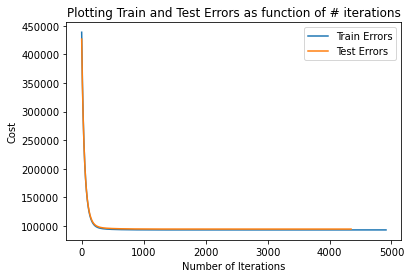

In [1307]:
plt.plot(list(range(Iterations1)),CostList1,label="Train Errors")
plt.plot(list(range(Iterations2)),CostList2,label="Test Errors")
plt.title("Plotting Train and Test Errors as function of # iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

# Picking 8 random features

In [1373]:
from random import randint,choice
random_cols=[]
seed(100)
cols=list(data)
for i in range(15):
    selection = randint(1,15)
    if(selection not in random_cols):
        random_cols.append(selection)
    if(len(random_cols)==8):
        break  
random_cols.sort()
random_cols

[2, 3, 6, 7, 8, 9, 12, 13]

In [1467]:
# Differentiating dependent and independent variables
X8rf = data.iloc[:,random_cols].values
Y8rf = data.iloc[:,0].values

In [1468]:
from sklearn.model_selection import train_test_split
X_train8rf, X_test8rf, Y_train8rf, Y_test8rf = train_test_split(X8rf,Y8rf,test_size=0.2,random_state=0)

In [1470]:
# Running the linear regression with the best parameters from entire data
learning_rate8rf = 0.01
convergence8rf = 0.001

#Train Data
CostList8rf, Iterations8rf, beta8rf = GradientDescent(X_train8rf, Y_train8rf,learning_rate8rf,convergence8rf)
#Predicting on Test Data
test_error8rf=Predict(X_test8rf,Y_test8rf,beta8rf)

In [1471]:
print("Iterations:",Iterations8rf)
print("Train Error:",CostList8rf[-1])
print("Test Error:",test_error8rf)

Iterations: 24117
Train Error: [124011.77726193]
Test Error: [128190.05219587]


In [1388]:
# Running Linear Regression on entire data
learning_rate_l = 0.01
convergence_l = 0.001

#Train Data
CostList_l, Iterations_l, beta_l = GradientDescent(X_train, Y_train,learning_rate_l,convergence_l)
print("Iterations:",Iterations_l)
print("Train Error:",CostList_l[-1])
#Predicting on Test Data
test_error_l=Predict(X_test,Y_test,beta_l)
print("Test Error:",test_error_l)

Iterations: 4913
Train Error: [93098.28654603]
Test Error: [95337.67542922]


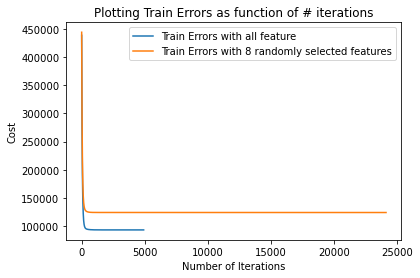

In [1391]:
# Train Error plot against iterations 
plt.plot(list(range(Iterations_l)),CostList_l,label="Train Errors with all feature")
plt.plot(list(range(Iterations8)),CostList8,label="Train Errors with 8 randomly selected features")
plt.title("Plotting Train Errors as function of # iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [ ]:
# Test Error plot against iterations 
plt.plot(list(range(Iterations_l)),CostList_l,label="Train Errors with all feature")
plt.plot(list(range(Iterations8)),CostList8,label="Train Errors with 8 randomly selected features")
plt.title("Plotting Train Errors as function of # iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

Text(0.5, 1.0, 'HeatMap for Linear Regression Data')

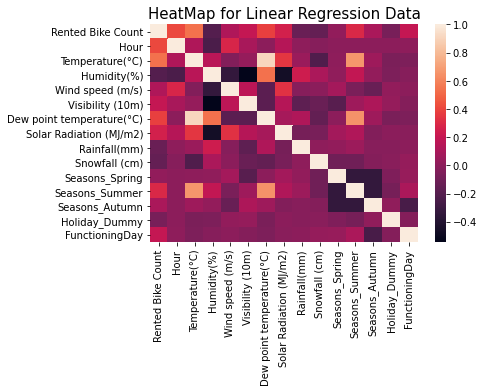

In [1449]:
import seaborn as sns

ax=data.corr()
sns.heatmap(ax)
plt.title("HeatMap for Linear Regression Data", fontsize =15)

# Best 8 features

In [1452]:
# Differentiating dependent and independent variables
X8a = data.iloc[:,[1,2,3,6,7,8,9,11]].values
Y8a = data.iloc[:,0].values

from sklearn.model_selection import train_test_split
X_train8a, X_test8a, Y_train8a, Y_test8a = train_test_split(X8a,Y8a,test_size=0.2,random_state=0)

In [1453]:
# Running Linear Regression on entire data
learning_rate8a = 0.01
convergence8a = 0.001

#Train Data
CostList8a, Iterations8a, beta8a = GradientDescent(X_train8a, Y_train8a,learning_rate8a,convergence8a)
print("Iterations:",Iterations8a)
print("Train Error:",CostList8a[-1])
#Predicting on Test Data
test_error8a=Predict(X_test8a,Y_test8a,beta8a)
print("Test Error:",test_error8a)

Iterations: 2186
Train Error: [108978.49212731]
Test Error: [113610.0979379]


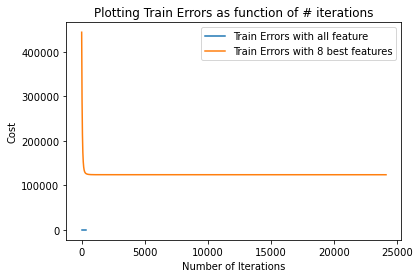

In [1473]:
# Test Error plot against iterations 
plt.plot(list(range(Iterations_l)),CostList_l,label="Train Errors with all feature")
plt.plot(list(range(Iterations8rf)),CostList8,label="Train Errors with 8 best features")
plt.title("Plotting Train Errors as function of # iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

# Logistic Regression

In [1397]:
from math import log as log
from math import exp as exp
import copy

In [1406]:
data2 = copy.deepcopy(data)

In [1407]:
DayLight=[]
for hour in data["Hour"]:
    if (hour>5 and hour<19):
        DayLight.append(1)
    else:
        DayLight.append(0)
        
data2["DayLight"] = DayLight
del data2["Hour"]

In [1408]:
data2

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Autumn,Holiday_Dummy,FunctioningDay,DayLight
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,1,0,1,0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,1,0,1,0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,1,0,1,0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,1,0,1,0


In [1409]:
# Differentiating dependent and independent variables
X = data2.iloc[:,:-1].values
Y = data2.iloc[:,-1].values

In [1410]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [1411]:
def Logistic_Cost_Function(beta,X,Y):
    epsilon = 1e-7  # Adding epsilon as a constant value to the value inside log to avoid making it absolute Zero and preventing Runtime Error
    J =0 
    m = len(Y)
    y_pred = 1/(1+np.exp(-(np.dot(X,beta))))
    J = (-1/m)*np.sum((Y*np.log(y_pred+epsilon))+((1-Y)*np.log(1-y_pred+epsilon)))
    return J

In [1412]:
def Logistic_GradientDescent(X_train, Y_train , learning_rate, convergence):
    
    #Feature_Scaling(X_train)
    
    np.random.seed(100)
    beta = (np.random.sample(len(X_train[0])+1)*10).reshape(len(X_train[0])+1,1)
    L = learning_rate
    old_cost=0
    Convergence_Criteria =1
    #convergence = 0.01
    CostList=[]

    one_column = np.ones((X_train.shape[0],1))
    X = np.concatenate((one_column, X_train), axis = 1)
   
    Y = Y_train.reshape(len(Y_train),1)
    m = len(Y)
    
    i=0
    
    while(Convergence_Criteria>convergence):
    #for i in range (1):
        y_pred = 1/(1+np.exp((-1)*(np.dot(X,beta)))) # 7008x1 | Y=7008x1 # 1+np.exp((-1)*(b[0]+ np.dot(b[1:],x)))
        
        for j in range(X.shape[1]): #range = 0 to 15 [number of variables]
            beta[j] = beta[j] - (L/m) * sum((y_pred - Y) * X.T[j].reshape(len(X.T[1]),1)) # Changing X shape into 7008X1

        #print(y_pred)
        cost = Logistic_Cost_Function(beta,X,Y)
        CostList.append(cost)
        if(len(CostList)>1):
            Convergence_Criteria = CostList[-2]-CostList[-1]
        i+=1
        #print("Convergence_Criteria: ",Convergence_Criteria)

    #print("Number of Iterations: ",i)
    
    return CostList, i, beta 

In [1413]:
def Logistic_Predict(X,Y,beta):
    epsilon = 1e-7  
    X=Feature_Scaling(X)
    Y = Y.reshape(len(Y),1)
    y_pred = 1/(1+np.exp(-(np.dot(X,beta[1:])+beta[0])))
    m=len(y_pred)
    J = (-1/m)*sum((Y*np.log(y_pred+epsilon))+((1-Y)*np.log(1-y_pred+epsilon)))
    return J

# Working with Learning rates

In [1231]:
learning_rate_lg = [0.1, 0.2, 0.3]
convergence_lg = 0.0001
All_Cost_lg = []
IterationList_lg=[]
TrainErrors_lg=[]
TestErrors_lg =[]
Feature_Scaling(X_train)
for alpha in learning_rate_lg:
    CostList, Iterations, beta = Logistic_GradientDescent(X_train, Y_train,alpha,convergence_lg)
    All_Cost_lg.append(CostList)
    print("Number of Iterations: ",Iterations)
    IterationList_lg.append(Iterations)
    print("Cost after Convergence: ",CostList[-1])
    TrainErrors_lg.append(CostList[-1])
    
    #Predicting with the beta values calculated
    test_error=Logistic_Predict(X_test,Y_test,beta)
    TestErrors_lg.append(test_error)

Number of Iterations:  988
Cost after Convergence:  0.31559586772965365
Number of Iterations:  522
Cost after Convergence:  0.31163345950422977
Number of Iterations:  362
Cost after Convergence:  0.3099475866447624


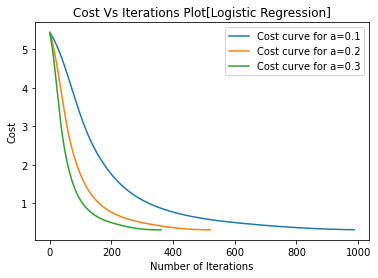

In [1239]:
for i in range(len(learning_rate_lg)):
    plt.plot(All_Cost_lg[i],label="Cost curve for a="+str(learning_rate_lg[i]))

plt.title("Cost Vs Iterations Plot[Logistic Regression]")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [1237]:
df_lg = {"Learning Rate":learning_rate_lg,"Convergence Threshold":convergence_lg,"Iterations":IterationList_lg,"Train Errors":TrainErrors_lg,"Test Errors":TestErrors_lg}
table_lg=pd.DataFrame(df_lg) 


In [1238]:
table_lg

,Learning Rate,Convergence Threshold,Iterations,Train Errors,Test Errors
0,0.1,0.0001,988,0.315596,[0.3044293855706163]
1,0.2,0.0001,522,0.311633,[0.3013100373024061]
2,0.3,0.0001,362,0.309948,[0.300169029552984]


# Working with Different Convergence levels

In [1247]:
learning_rate_lg1 = 0.3
convergence_lg1 = [0.1,0.01,0.001,0.0001]
All_Cost_lg1 = []
IterationList_lg1=[]
TrainErrors_lg1=[]
TestErrors_lg1 =[]
for convergence_lg1 in convergence_lg1:
    print("Convergence Criteria: ",convergence_lg1)
    CostList, Iterations, beta = Logistic_GradientDescent(X_train, Y_train,learning_rate_lg1,convergence_lg1)
    All_Cost_lg1.append(CostList)
    print("Number of Iterations: ",Iterations)
    IterationList_lg1.append(Iterations)
    print("Cost after Convergence: ",CostList[-1])
    TrainErrors_lg1.append(CostList[-1])
    
    #Predicting with the beta values calculated
    test_error=Logistic_Predict(X_test,Y_test,beta)
    TestErrors_lg1.append(test_error)

Convergence Criteria:  0.1
Number of Iterations:  2
Cost after Convergence:  5.3768618093509195
Convergence Criteria:  0.01
Number of Iterations:  113
Cost after Convergence:  0.9405119271821545
Convergence Criteria:  0.001
Number of Iterations:  293
Cost after Convergence:  0.33789829020534795
Convergence Criteria:  0.0001
Number of Iterations:  362
Cost after Convergence:  0.3099475866447624


In [1259]:
df_lg1 = {"Learning Rate":learning_rate_lg1,"Convergence Threshold":[0.1,0.01,0.001,0.0001],"Iterations":IterationList_lg1,"Train Errors":TrainErrors_lg1,"Test Errors":TestErrors_lg1}
pd.DataFrame(df_lg1) 

,Learning Rate,Convergence Threshold,Iterations,Train Errors,Test Errors
0,0.3,0.1000,2,5.376862,[5.552838521408217]
1,0.3,0.0100,113,0.940512,[0.8876389133516024]
2,0.3,0.0010,293,0.337898,[0.32425823337794996]
3,0.3,0.0001,362,0.309948,[0.300169029552984]


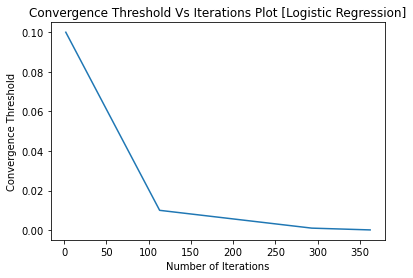

In [1258]:
#plt.plot(convergence1,IterationList1)
plt.plot(IterationList_lg1,[0.1,0.01,0.001,0.0001])
plt.title("Convergence Threshold Vs Iterations Plot [Logistic Regression]")
plt.xlabel("Number of Iterations")
plt.ylabel("Convergence Threshold")
#plt.legend()
plt.show()

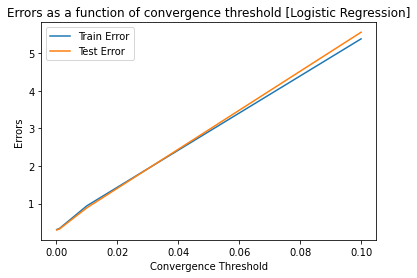

In [1264]:
# Plotting Threshold Vs Train and Test Errors
plt.plot([0.1,0.01,0.001,0.0001],TrainErrors_lg1, label ="Train Error")
plt.plot([0.1,0.01,0.001,0.0001],TestErrors_lg1, label ="Test Error")
plt.title("Errors as a function of convergence threshold [Logistic Regression]")
plt.ylabel("Errors")
plt.xlabel("Convergence Threshold")
plt.legend()
plt.show()

# 8 randomly picked features

In [1414]:
# Running the logistic regression with the best parameters from entire data
learning_rate_l = 0.3
convergence_l = 0.0001
Feature_Scaling(X_train)
#Train Data
CostList_l, Iterations_l, beta_l = Logistic_GradientDescent(X_train, Y_train,learning_rate_l,convergence_l)
#Predicting on Test Data
test_error_l=Logistic_Predict(X_test,Y_test,beta_l)

In [1416]:
print("Iterations:",Iterations_l)
print("Train Error:",CostList_l[-1])
print("Test Error:",test_error_l)

Iterations: 362
Train Error: 0.3099475866447624
Test Error: [0.30016903]


In [1436]:
random_cols_l=[]
for i in range (8):
    random_cols_l.append(random_cols[i]-1)
    
# Differentiating dependent and independent variables
X8l = data2.iloc[:,random_cols_l].values
Y8l = data2.iloc[:,-1].values

In [1437]:
from sklearn.model_selection import train_test_split
X_train8l, X_test8l, Y_train8l, Y_test8l = train_test_split(X8l,Y8l,test_size=0.2,random_state=0)

In [1438]:
# Running the logistic regression with the best parameters from 8 features
learning_rate8_l = 0.01
convergence8_l = 0.001
Feature_Scaling(X_train8l)
#Train Data
CostList8_l, Iterations8_l, beta8_l = Logistic_GradientDescent(X_train8l, Y_train8l,learning_rate8_l,convergence8_l)
#Predicting on Test Data
test_error8_l=Logistic_Predict(X_test8l,Y_test8l,beta8_l)

print("Iterations:",Iterations8_l)
print("Train Error:",CostList8_l[-1])
print("Test Error:",test_error8_l)

Iterations: 1907
Train Error: 1.5756855974769777
Test Error: [1.51350817]


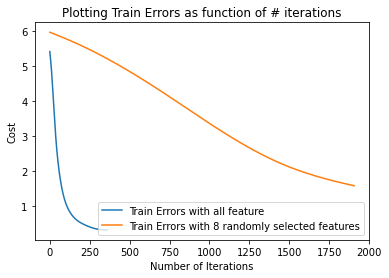

In [1439]:
# Test Error plot against iterations 
plt.plot(list(range(Iterations_l)),CostList_l,label="Train Errors with all feature")
plt.plot(list(range(Iterations8_l)),CostList8_l,label="Train Errors with 8 randomly selected features")
plt.title("Plotting Train Errors as function of # iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [1441]:
data2

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Autumn,Holiday_Dummy,FunctioningDay,DayLight
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,1,0,1,0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,1,0,1,0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,1,0,1,0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,1,0,1,0


# Best 8 features

Text(0.5, 1.0, 'HeatMap for Logistic Regression Data')

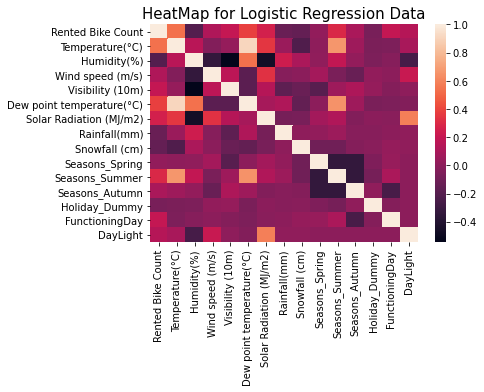

In [1456]:
import seaborn as sns
ax=data2.corr()
sns.heatmap(ax)
plt.title("HeatMap for Logistic Regression Data", fontsize =15)

In [1458]:
# Differentiating dependent and independent variables
X8bf = data2.iloc[:,[0,1,2,3,4,5,6,13]].values
Y8bf = data2.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train8bf, X_test8bf, Y_train8bf, Y_test8bf = train_test_split(X8bf,Y8bf,test_size=0.2,random_state=0)

In [1459]:
# Running the logistic regression with the best parameters from 8 features
learning_rate8bf = 0.01
convergence8bf = 0.001
Feature_Scaling(X_train8bf)
#Train Data
CostList8bf, Iterations8bf, beta8bf = Logistic_GradientDescent(X_train8bf, Y_train8bf,learning_rate8bf,convergence8bf)
#Predicting on Test Data
test_error8bf=Logistic_Predict(X_test8bf,Y_test8bf,beta8bf)

print("Iterations:",Iterations8bf)
print("Train Error:",CostList8bf[-1])
print("Test Error:",test_error8bf)

Iterations: 1779
Train Error: 0.8258802397604774
Test Error: [0.82921912]


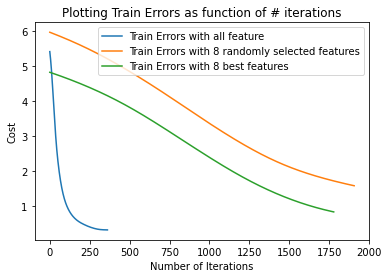

In [1460]:
plt.plot(list(range(Iterations_l)),CostList_l,label="Train Errors with all feature")
plt.plot(list(range(Iterations8_l)),CostList8_l,label="Train Errors with 8 randomly selected features")
plt.plot(list(range(Iterations8bf)),CostList8bf,label="Train Errors with 8 best features")
plt.title("Plotting Train Errors as function of # iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()